In [1]:
import numpy as np
import scipy.io
import h5py

%matplotlib inline
import matplotlib.pyplot as plt

In [182]:
data = scipy.io.loadmat('Downloads/SystemOutput_V2.mat',struct_as_record=True)

In [205]:
X = data['X'][:,600:3000:10,:]
t = np.squeeze(data['T'])[600:3000:10]

idc = np.where(X[...,0].mean(axis=1) > 0.3)[0]

X = X[idc] / X[idc,...,0:1]

X.shape, t.shape

((2700, 240, 6), (240,))

In [79]:
compand = lambda x : np.sign(x) * np.log(1 + abs(x)) #np.sign(x) * (np.log(1 + 3 * abs(x))/np.log(1 + 3))

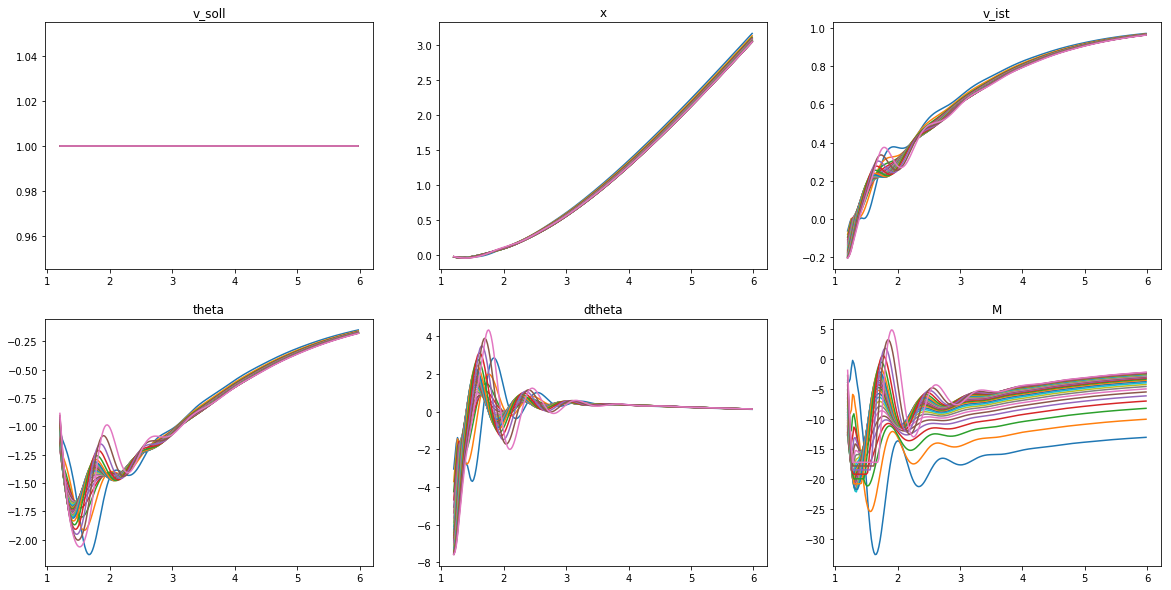

In [184]:
fig, axes = plt.subplots(2,3,figsize=(20,10))
axes = axes.flatten()

titles = ['v_soll', 'x', 'v_ist', 'theta', 'dtheta', 'M']

for i, ax in enumerate(axes):
    d = X[::100,:,i]
    ax.plot(t, d.T)
    ax.set_title(titles[i])

plt.show()

In [225]:
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Lasso, Ridge

def prepare_data(X, n_timepoints)

    n_timepoints = 12

    x = X[:2000,:-n_timepoints].reshape(-1,n_timepoints,6)
    y = X[:2000,n_timepoints:,[2,4]].reshape(-1,n_timepoints,2)

    xv = X[2000:,:-n_timepoints].reshape(-1,n_timepoints,6)
    yv = X[2000:,n_timepoints:,[2,4]].reshape(-1,n_timepoints,2)
    
    return x, y, xv, yv

def compress_data()

    pca_x = PCA(n_components=50, whiten="True")
    pca_y = PCA(n_components=20)

    x_ = x.reshape(-1,n_timepoints*6) # pca_x.fit_transform(x.reshape(-1,n_timepoints*2))
    y_ = y[:,0,:].reshape(-1,2)

    xv_ = xv.reshape(-1,n_timepoints*6) # pca_x.transform(xv.reshape(-1,n_timepoints*2))
    yv_ = yv[:,0,:].reshape(-1,2)
    
def fit_model(x_, y_, xv_):
    lm = Ridge(alpha=0.001, fit_intercept=True, normalize=True, copy_X=True)
    lm.fit(x_,y_)
    p = lm.predict(xv_)
    
    return p

SyntaxError: invalid syntax (<ipython-input-225-6b3523890c75>, line 4)

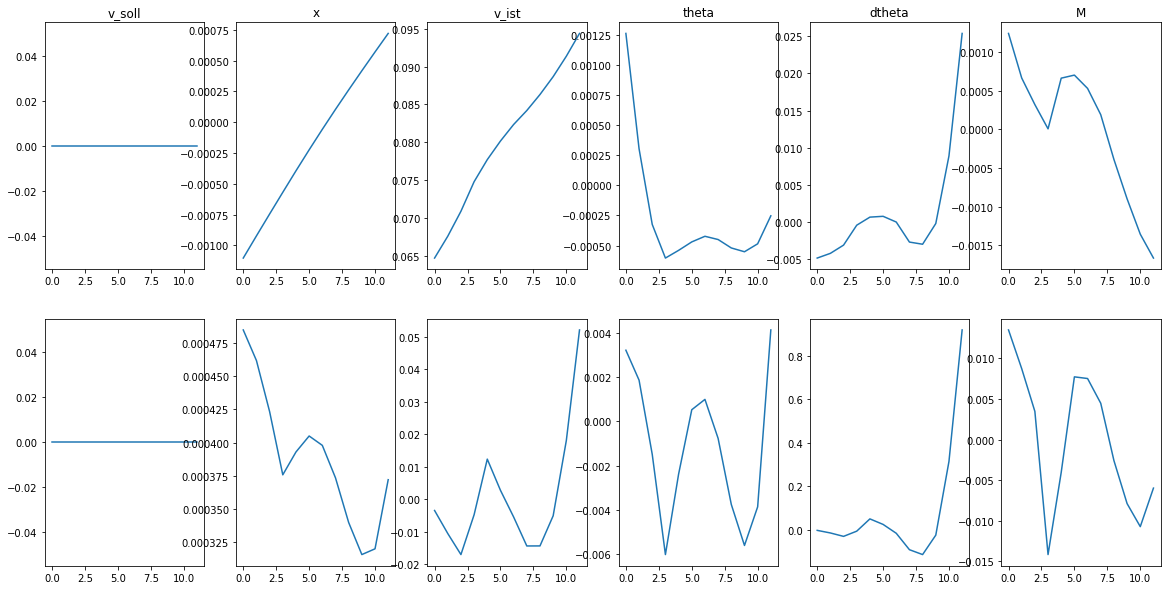

In [222]:
W = lm.coef_.reshape(2,n_timepoints,6)

_,ax = plt.subplots(2,6,figsize=(20,10))
n = 0
titles = ['v_soll', 'x', 'v_ist', 'theta', 'dtheta', 'M']
for i in range(W.shape[0]):
    for j in range(W.shape[2]):
        ax[i,j].plot(W[i,:,j])
        
        if i == 0:
            ax[i,j].set_title(titles[n])
            n += 1

(13300, 2)

(700, 19, 2) (700, 228, 2) (228,) (3,)


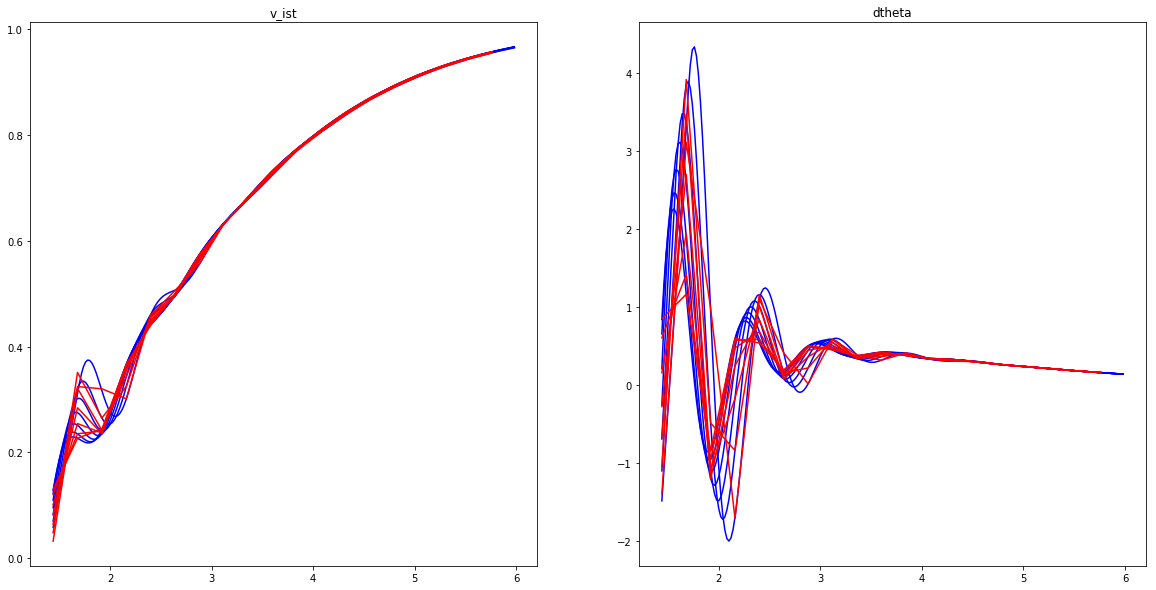

In [224]:
p = p.reshape(700,-1,2)
Y = yv.reshape(700,-1,2)

print(p.shape, Y.shape, t[n_timepoints:].shape, t[n_timepoints::100].shape)

#####

fig, axes = plt.subplots(1,2,figsize=(20,10))
axes = axes.flatten()

titles = ['v_ist', 'dtheta']

for i, ax in enumerate(axes):
    ax.plot(t[n_timepoints:],    Y[::100,:,i].T, c='blue')
    #print(t[n_timepoints::n_timepoints].shape, p[::100,:,i].shape)
    ax.plot(t[n_timepoints::n_timepoints], p[::100,:,i].T, c='red')
    
    ax.set_title(titles[i])

plt.show()

In [143]:
p = pca_y.inverse_transform(model.predict(x_)).reshape(-1,n_timepoints,4)
p = p.reshape(2000,-1,4)
Y = y.reshape(2000,-1,4)

print(p.shape, Y.shape)

fig, axes = plt.subplots(2,2,figsize=(20,10))
axes = axes.flatten()

titles = ['v_soll', 'x', 'v_ist', 'theta', 'dtheta', 'M']

for i, ax in enumerate(axes):
    ax.plot(Y[::100,:,i].T, c='blue')
    ax.plot(p[::100,:,i].T, c='red')
    
    ax.set_title(titles[i])

plt.show()

AttributeError: 'PCA' object has no attribute 'components_'

In [ ]:
from sklearn.svm import SVR

svm = SVR()

svm.fit(x_,y_[:,0])

In [61]:
samples = X.reshape(-1,100,6)

x = samples[...,[0,-1]]
y = samples[...,1:-1]

from sklearn.decomposition import PCA

def compress_history(x,y):
    pca = PCA(n_components=10)
    pca.fit(y[:,:,-1])
    print(np.cumsum(pca.explained_variance_ratio_))

[ 0.82212705  0.99722015  0.99978661  0.99995918  0.99998675  0.99999363
  0.99999674  0.99999799  0.99999853  0.9999989 ]


(10, 10)

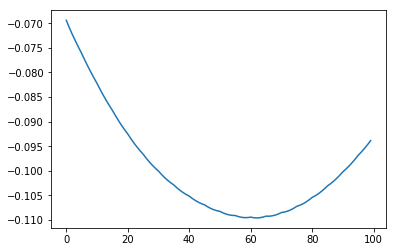

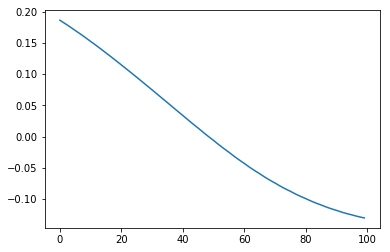

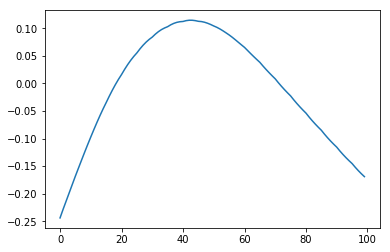

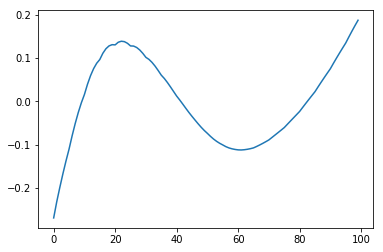

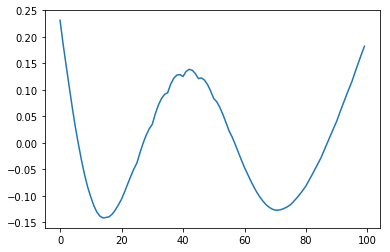

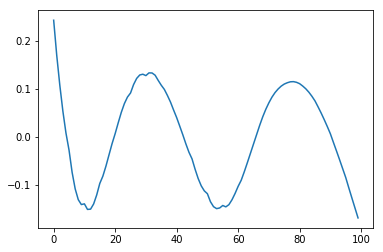

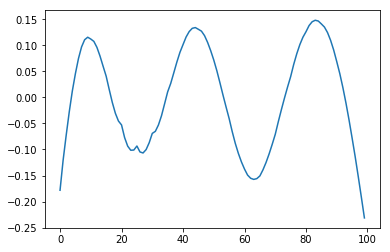

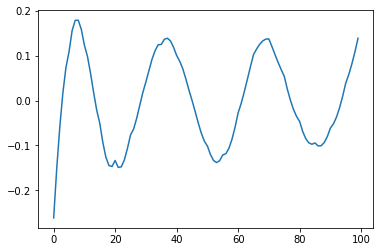

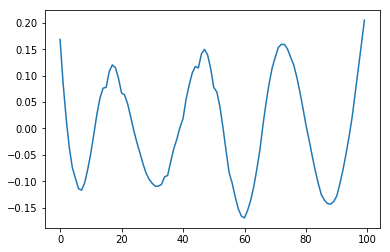

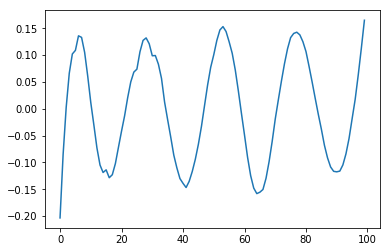

In [62]:
for i in range(len(pca.components_)):
    plt.plot(pca.components_[i])
    plt.show()